# Practical about Basic Classification Systems
* Alicia Peñaranda Navazo
* Sergio Muñoz Gonzalez

In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import colors
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Breast cancer cells data

## Loading breast cancer cells data

In [2]:
data1 = pd.read_csv('wdbc.csv')
X1 = data1.values[ :, 2:].astype(np.float)
y1 = (data1.values[ :, 1 ] == 'B').astype(np.int)
data1.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Naive Bayes classifier

In [3]:
NB_performance={}    
for ntraining in range(1,21):
    #We randomly split the data into train and test partitions. We use 2/3 of the data for training and 1/3 for testing.
    X1_train, X1_test, y1_train, y1_test = train_test_split( \
        X1, y1, test_size=1/3, random_state=ntraining)
    #standarization
    scaler = preprocessing.StandardScaler().fit(X1_train)
    X1_train_scaled = scaler.transform(X1_train)
    X1_test_scaled = scaler.transform(X1_test)

    #print(np.var(X1_train[:,0]))
    #print(np.var(X1_train[:,1]))
    #print(np.var(X1_train_scaled[:,0]))
    #print(np.var(X1_train_scaled[:,1]))
    
    if round(np.var(X1_train_scaled[:,0])) == 1 and round(np.var(X1_test_scaled[:,0])) == 1: #we test if var is close to 1 before continue
        #Trainning the calssifier with standarized data
        nb = GaussianNB()
        nb.fit(X1_train_scaled, y1_train)
        y1_pred = nb.predict(X1_test_scaled)

        # Evaluating Naive bayes algorithm performance
        conf = confusion_matrix(y1_test, y1_pred)
        # The matrix conf contains:
        # TN | FN
        # FP | TP

        TN = conf[0][0]
        TP = conf[1][1]
        FP = conf[0][1]
        FN = conf[1][0]
        PredictionAcc=(TP + TN) / (TN + TP + FP + FN)
        TPR=TP / (TP + FN)
        TNR=TN / (TN + FP)
        PredictionError=1-PredictionAcc
        NB_performance[ntraining]=[PredictionAcc,PredictionError,TPR,TNR]
        #Once we calculate all the estimations  for each training, we create a DataFrame
        if ntraining == 20:
            NB_df=pd.DataFrame(NB_performance,index=['PredictionAcc','PredictionError','TPR','TNR'])
            
NB_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
PredictionAcc,0.952632,0.952632,0.910526,0.957895,0.921053,0.942105,0.936842,0.931579,0.942105,0.926316,0.910526,0.926316,0.884211,0.921053,0.947368,0.936842,0.936842,0.942105,0.952632,0.936842
PredictionError,0.047368,0.047368,0.089474,0.042105,0.078947,0.057895,0.063158,0.068421,0.057895,0.073684,0.089474,0.073684,0.115789,0.078947,0.052632,0.063158,0.063158,0.057895,0.047368,0.063158
TPR,0.952756,0.991453,0.932203,0.992000,0.942623,0.983471,0.976000,0.955752,0.956897,0.950820,0.932203,0.918699,0.892562,0.929825,0.964912,0.941667,0.966102,0.974790,0.983193,0.932203
TNR,0.952381,0.890411,0.875000,0.892308,0.882353,0.869565,0.861538,0.896104,0.918919,0.882353,0.875000,0.940299,0.869565,0.907895,0.921053,0.928571,0.888889,0.887324,0.901408,0.944444


In [4]:
#we create a DataFrame with statistics to better see the global approach
NB_stats=pd.DataFrame({'mean':NB_df.mean(1),'std':NB_df.std(1),'max':NB_df.max(1),'min':NB_df.min(1)},index=['PredictionAcc','PredictionError','TPR','TNR'])
NB_stats

,mean,std,max,min
PredictionAcc,0.933421,0.017850,0.957895,0.884211
PredictionError,0.066579,0.017850,0.115789,0.042105
TPR,0.953507,0.026237,0.992000,0.892562
TNR,0.899269,0.026822,0.952381,0.861538


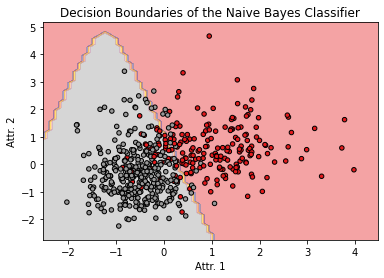

In [5]:
X = X1[:, [0, 1]]
# standarize the data
X1_scaled = preprocessing.scale(X)
# train the classifier
nb.fit(X1_scaled, y1)
# plot the decision boundaries
x_min, x_max = X1_scaled[:, 0].min() - .5, X1_scaled[:, 0].max() + .5
y_min, y_max = X1_scaled[:, 1].min() - .5, X1_scaled[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=y1, s=20, edgecolor='k',\
        cmap=plt.cm.Set1)
plt.title('Decision Boundaries of the Naive Bayes Classifier')
plt.xlabel('Attr. 1')
plt.ylabel('Attr. 2')

plt.show()

## LDA classifier

In [6]:
LDA_performance={}    
for ntraining in range(1,21):
    #We randomly split the data into train and test partitions. We use 2/3 of the data for training and 1/3 for testing.
    X1_train, X1_test, y1_train, y1_test = train_test_split( \
        X1, y1, test_size=1/3, random_state=ntraining)
    #standarization
    scaler = preprocessing.StandardScaler().fit(X1_train)
    X1_train_scaled = scaler.transform(X1_train)
    X1_test_scaled = scaler.transform(X1_test)

    #print(np.var(X1_train[:,0]))
    #print(np.var(X1_train[:,1]))
    #print(np.var(X1_train_scaled[:,0]))
    #print(np.var(X1_train_scaled[:,1]))
    
    if round(np.var(X1_train_scaled[:,0])) == 1 and round(np.var(X1_test_scaled[:,0])) == 1: #we test if var is close to 1 before continue
        #Trainning the classifier with standarized data
        lda = LinearDiscriminantAnalysis()
        lda.fit(X1_train_scaled, y1_train)
        y1_pred = lda.predict(X1_test_scaled)

        # Evaluating LDA algorithm performance
        conf = confusion_matrix(y1_test, y1_pred)
        # The matrix conf contains:
        # TN | FN
        # FP | TP

        TN = conf[0][0]
        TP = conf[1][1]
        FP = conf[0][1]
        FN = conf[1][0]
        PredictionAcc=(TP + TN) / (TN + TP + FP + FN)
        TPR=TP / (TP + FN)
        TNR=TN / (TN + FP)
        PredictionError=1-PredictionAcc
        LDA_performance[ntraining]=[PredictionAcc,PredictionError,TPR,TNR]
        #Once we calculate all the estimations  for each training, we create a DataFrame 
        if ntraining == 20:
            LDA_df=pd.DataFrame(LDA_performance,index=['PredictionAcc','PredictionError','TPR','TNR'])
LDA_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
PredictionAcc,0.968421,0.957895,0.926316,0.957895,0.952632,0.942105,0.957895,0.947368,0.947368,0.947368,0.963158,0.936842,0.942105,0.947368,0.963158,0.973684,0.957895,0.936842,0.936842,0.968421
PredictionError,0.031579,0.042105,0.073684,0.042105,0.047368,0.057895,0.042105,0.052632,0.052632,0.052632,0.036842,0.063158,0.057895,0.052632,0.036842,0.026316,0.042105,0.063158,0.063158,0.031579
TPR,1.000000,0.991453,0.991525,0.992000,1.000000,0.991736,0.992000,0.982301,0.991379,0.991803,0.991525,0.991870,1.000000,1.000000,1.000000,1.000000,0.991525,1.000000,1.000000,0.991525
TNR,0.904762,0.904110,0.819444,0.892308,0.867647,0.855072,0.892308,0.896104,0.878378,0.867647,0.916667,0.835821,0.840580,0.868421,0.907895,0.928571,0.902778,0.830986,0.830986,0.930556


In [7]:
#we create a DataFrame with statistics to better see the global approach
LDA_stats=pd.DataFrame({'mean':LDA_df.mean(1),'std':LDA_df.std(1),'max':LDA_df.max(1),'min':LDA_df.min(1)},index=['PredictionAcc','PredictionError','TPR','TNR'])
LDA_stats

,mean,std,max,min
PredictionAcc,0.951579,0.012618,0.973684,0.926316
PredictionError,0.048421,0.012618,0.073684,0.026316
TPR,0.994532,0.005024,1.000000,0.982301
TNR,0.878552,0.034268,0.930556,0.819444


## QDA classfier

In [8]:
QDA_performance={}    
for ntraining in range(1,21):
    #We randomly split the data into train and test partitions. We use 2/3 of the data for training and 1/3 for testing.
    X1_train, X1_test, y1_train, y1_test = train_test_split( \
        X1, y1, test_size=1/3, random_state=ntraining)
    #standarization
    scaler = preprocessing.StandardScaler().fit(X1_train)
    X1_train_scaled = scaler.transform(X1_train)
    X1_test_scaled = scaler.transform(X1_test)

    #print(np.var(X1_train[:,0]))
    #print(np.var(X1_train[:,1]))
    #print(np.var(X1_train_scaled[:,0]))
    #print(np.var(X1_train_scaled[:,1]))
    
    if round(np.var(X1_train_scaled[:,0])) == 1 and round(np.var(X1_test_scaled[:,0])) == 1: #we test if var is close to 1 before continue
        # Defining the Pipeline
        pipeline = Pipeline([ ('qda', QuadraticDiscriminantAnalysis()) ])
        
        # Indicating Potential Values for the Hyperparameters
        reg_param_values = np.linspace(0, 1, 10).tolist()
        param_grid = { 'qda__reg_param': reg_param_values }
        
        # Evaluating the Performance for each Value of the Hyperparameters
        skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)
        gridcv = GridSearchCV(pipeline, cv=skfold, n_jobs=1, param_grid=param_grid, \
            scoring=make_scorer(accuracy_score))
        result = gridcv.fit(X1_train_scaled, y1_train)
        
        # Obtaining results
        accuracies = gridcv.cv_results_['mean_test_score']
        std_accuracies = gridcv.cv_results_['std_test_score']
        accuracieslist=accuracies.tolist()
        best_accuracyindex=accuracieslist.index(max(accuracieslist))
        best_reg_param= reg_param_values[best_accuracyindex]
        
        #Trainning the classifier with standarized data
        qda = QuadraticDiscriminantAnalysis(reg_param = best_reg_param)
        qda.fit(X1_train_scaled, y1_train)
        y1_pred = qda.predict(X1_test_scaled)

        # Evaluating QDA algorithm performance
        conf = confusion_matrix(y1_test, y1_pred)
        # The matrix conf contains:
        # TN | FN
        # FP | TP

        TN = conf[0][0]
        TP = conf[1][1]
        FP = conf[0][1]
        FN = conf[1][0]
        PredictionAcc=(TP + TN) / (TN + TP + FP + FN)
        TPR=TP / (TP + FN)
        TNR=TN / (TN + FP)
        PredictionError=1-PredictionAcc
        QDA_performance[ntraining]=[PredictionAcc,PredictionError,TPR,TNR]
        #Once we calculate all the estimations  for each training, we create a DataFrame 
        if ntraining == 20:
            QDA_df=pd.DataFrame(QDA_performance,index=['PredictionAcc','PredictionError','TPR','TNR'])
QDA_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
PredictionAcc,0.973684,0.963158,0.968421,0.973684,0.963158,0.968421,0.968421,0.952632,0.963158,0.957895,0.947368,0.963158,0.942105,0.957895,0.978947,0.984211,0.957895,0.957895,0.963158,0.973684
PredictionError,0.026316,0.036842,0.031579,0.026316,0.036842,0.031579,0.031579,0.047368,0.036842,0.042105,0.052632,0.036842,0.057895,0.042105,0.021053,0.015789,0.042105,0.042105,0.036842,0.026316
TPR,0.976378,0.991453,0.991525,0.992000,1.000000,0.983471,0.992000,0.973451,0.991379,1.000000,0.983051,0.967480,0.983471,0.991228,0.991228,1.000000,0.974576,0.991597,1.000000,0.983051
TNR,0.968254,0.917808,0.930556,0.938462,0.897059,0.942029,0.923077,0.922078,0.918919,0.882353,0.888889,0.955224,0.869565,0.907895,0.960526,0.957143,0.930556,0.901408,0.901408,0.958333


In [9]:
#we create a DataFrame with statistics to better see the global approach
QDA_stats=pd.DataFrame({'mean':QDA_df.mean(1),'std':QDA_df.std(1),'max':QDA_df.max(1),'min':QDA_df.min(1)},index=['PredictionAcc','PredictionError','TPR','TNR'])
QDA_stats

,mean,std,max,min
PredictionAcc,0.963947,0.010285,0.984211,0.942105
PredictionError,0.036053,0.010285,0.057895,0.015789
TPR,0.987867,0.009501,1.000000,0.967480
TNR,0.923577,0.028253,0.968254,0.869565


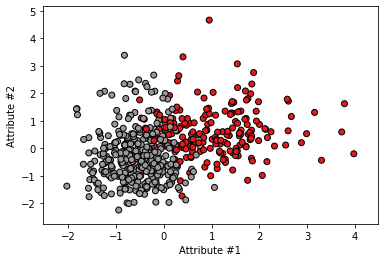

In [10]:
X = X1[:, [0, 1]]
# standarize the data
X1_scaled = preprocessing.scale(X)
# plotting the data
x_min, x_max = X1_scaled[:, 0].min() - .5, X1_scaled[:, 0].max() + .5
y_min, y_max = X1_scaled[:, 1].min() - .5, X1_scaled[:, 1].max() + .5

plt.figure()
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=y1, cmap=plt.cm.Set1, \
    edgecolor='k')
plt.xlabel('Attribute #1')
plt.ylabel('Attribute #2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [11]:
lda =  LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X1_scaled, y1)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X1_scaled, y1)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [12]:
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())

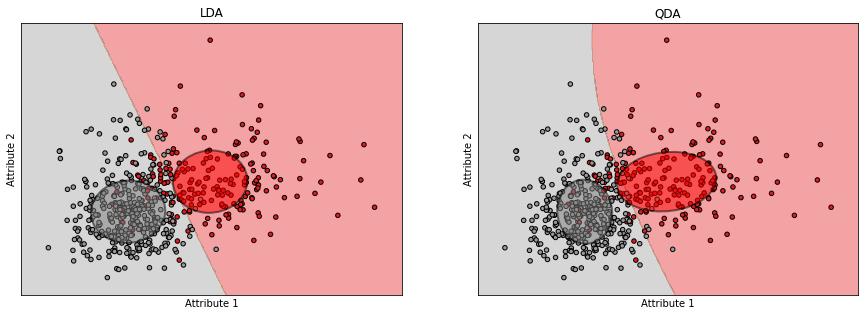

In [13]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 5))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[0].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
axarr[0].scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=y1, s=20, edgecolor='k',\
    cmap=plt.cm.Set1)
axarr[0].set_title('LDA')
axarr[0].set_xlabel('Attribute 1')
axarr[0].set_ylabel('Attribute 2')

plot_ellipse(axarr[0], lda.means_[0], lda.covariance_, 'red')
plot_ellipse(axarr[0], lda.means_[1], lda.covariance_, 'gray')

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[1].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
axarr[1].scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=y1, s=20, edgecolor='k',\
    cmap=plt.cm.Set1)
axarr[1].set_title('QDA')
axarr[1].set_xlabel('Attribute 1')
axarr[1].set_ylabel('Attribute 2')

plot_ellipse(axarr[1], qda.means_[0], qda.covariance_[0], 'red')
plot_ellipse(axarr[1], qda.means_[1], qda.covariance_[1], 'gray')

plt.show()

## NSC classifier

In [14]:
NSC_performance={}    
for ntraining in range(1,21):
    #We randomly split the data into train and test partitions. We use 2/3 of the data for training and 1/3 for testing.
    X1_train, X1_test, y1_train, y1_test = train_test_split( \
        X1, y1, test_size=1/3, random_state=ntraining)
    #standarization
    scaler = preprocessing.StandardScaler().fit(X1_train)
    X1_train_scaled = scaler.transform(X1_train)
    X1_test_scaled = scaler.transform(X1_test)

    #print(np.var(X1_train[:,0]))
    #print(np.var(X1_train[:,1]))
    #print(np.var(X1_train_scaled[:,0]))
    #print(np.var(X1_train_scaled[:,1]))
    
    if round(np.var(X1_train_scaled[:,0])) == 1 and round(np.var(X1_test_scaled[:,0])) == 1: #we test if var is close to 1 before continue
        # Defining the Pipeline
        pipeline_nsc = Pipeline([ ('nsc', NearestCentroid()) ])
        
        nsc_no_shrink = NearestCentroid(shrink_threshold = None)
        nsc_no_shrink.fit(X1_train_scaled, y1_train)
        max_param=np.amax(nsc_no_shrink.centroids_)
        # Indicating Potential Values for the Hyperparameters
        shrinkage_param_values = np.linspace(0, max_param, 20).tolist()
        param_grid_nsc = {'nsc__shrink_threshold': shrinkage_param_values}
        
        # Evaluating the Performance for each Value of the Hyperparameters
        skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)
        gridcv_nsc = GridSearchCV(pipeline_nsc, cv=skfold, n_jobs=1, param_grid=param_grid_nsc, \
            scoring=make_scorer(accuracy_score))
        result_nsc = gridcv_nsc.fit(X1_train_scaled, y1_train)
        
        # Obtaining results
        accuracies_nsc = gridcv_nsc.cv_results_['mean_test_score']
        std_accuracies_nsc = gridcv_nsc.cv_results_['std_test_score']
        best_reg_param= shrinkage_param_values[ np.argmax(accuracies_nsc) ]
        
        #Trainning the classifier/fitting the model
        nsc = NearestCentroid(shrink_threshold = shrinkage_param_values[ np.argmax(accuracies_nsc) ])
        nsc.fit(X1_train_scaled, y1_train)
        y1_pred = nsc.predict(X1_test_scaled)
        
        # Evaluating QDA algorithm performance
        conf = confusion_matrix(y1_test, y1_pred)
        
        TN = conf[0][0]
        TP = conf[1][1]
        FP = conf[0][1]
        FN = conf[1][0]
        PredictionAcc=np.sum(np.diag(conf)) / np.sum(conf)
        TPR=TP / (TP + FN)
        TNR=TN / (TN + FP)
        PredictionError=1-PredictionAcc
        NSC_performance[ntraining]=[PredictionAcc,PredictionError,TPR,TNR]
        #Once we calculate all the estimations  for each training, we create a DataFrame 
        if ntraining == 20:
            NSC_df=pd.DataFrame(NSC_performance,index=['PredictionAcc','PredictionError','TPR','TNR'])
NSC_df
        

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
PredictionAcc,0.931579,0.931579,0.915789,0.942105,0.921053,0.936842,0.947368,0.915789,0.926316,0.905263,0.915789,0.931579,0.889474,0.921053,0.936842,0.942105,0.926316,0.926316,0.926316,0.947368
PredictionError,0.068421,0.068421,0.084211,0.057895,0.078947,0.063158,0.052632,0.084211,0.073684,0.094737,0.084211,0.068421,0.110526,0.078947,0.063158,0.057895,0.073684,0.073684,0.073684,0.052632
TPR,0.944882,0.982906,0.966102,0.984000,0.959016,0.983471,0.992000,0.946903,0.965517,0.942623,0.949153,0.943089,0.925620,0.938596,0.964912,0.975000,0.974576,0.966387,0.974790,0.974576
TNR,0.904762,0.849315,0.833333,0.861538,0.852941,0.855072,0.861538,0.870130,0.864865,0.838235,0.861111,0.910448,0.826087,0.894737,0.894737,0.885714,0.847222,0.859155,0.845070,0.902778


In [15]:
#we create a DataFrame with statistics to better see the global approach
NSC_stats=pd.DataFrame({'mean':NSC_df.mean(1),'std':NSC_df.std(1),'max':NSC_df.max(1),'min':NSC_df.min(1)},index=['PredictionAcc','PredictionError','TPR','TNR'])
NSC_stats

,mean,std,max,min
PredictionAcc,0.926842,0.014277,0.947368,0.889474
PredictionError,0.073158,0.014277,0.110526,0.052632
TPR,0.962706,0.018176,0.992000,0.925620
TNR,0.865940,0.024910,0.910448,0.826087


# Prostate data

## Loading prostate data

In [16]:
data2= pd.read_csv('prostate.csv')
X2 = data2.values[ :, :-1].astype(np.float)
y2 = data2.values[:,-1]
data2.head()

,100_g_at,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,Y
0,6.927460,7.391657,3.812922,3.453385,6.070151,5.527153,5.812353,3.167275,7.354981,9.419909,...,3.770583,2.884436,2.730025,3.126168,2.870161,3.082210,2.747289,3.226588,3.480196,0
1,7.222432,7.329050,3.958028,3.407226,5.921265,5.376464,7.303408,3.108708,7.391872,10.539579,...,3.190759,2.460119,2.696578,2.675271,2.940032,3.126269,3.013745,3.517859,3.428752,1
2,6.776402,7.664007,3.783702,3.152019,5.452293,5.111794,7.207638,3.077360,7.488371,6.833428,...,3.325183,2.603014,2.469759,2.615746,2.510172,2.730814,2.613696,2.823436,3.049716,0
3,6.919134,7.469634,4.004581,3.341170,6.070925,5.296108,8.744059,3.117104,7.203028,10.400557,...,3.625057,2.765521,2.681757,3.310741,3.197177,3.414182,3.193867,3.353537,3.567482,0
4,7.113561,7.322408,4.242724,3.489324,6.141657,5.628390,6.825370,3.794904,7.403024,10.240322,...,3.698067,3.026876,2.691670,3.236030,3.003906,3.081497,2.963307,3.472050,3.598103,1


## Naive bayes classifier

In [17]:
NB2_performance={}    
for ntraining in range(1,21):
    #We randomly split the data into train and test partitions. We use 2/3 of the data for training and 1/3 for testing.
    X2_train, X2_test, y2_train, y2_test = train_test_split( \
        X2, y2, test_size=1/3, random_state=ntraining)
    #standarization
    scaler = preprocessing.StandardScaler().fit(X2_train)
    X2_train_scaled = scaler.transform(X2_train)
    X2_test_scaled = scaler.transform(X2_test)

    #print(np.var(X2_train[:,0]))
    #print(np.var(X2_train[:,1]))
    #print(np.var(X2_train_scaled[:,0]))
    #print(np.var(X2_train_scaled[:,1]))
    
    if round(np.var(X2_train_scaled[:,0])) == 1 and round(np.var(X2_test_scaled[:,0])) == 1: #we test if var is close to 1 before continue
        #Trainning the calssifier with standarized data
        nb = GaussianNB()
        nb.fit(X2_train_scaled, y2_train)
        y2_pred = nb.predict(X2_test_scaled)

        # Predicting and evaluating Naive bayes algorithm performance
        conf = confusion_matrix(y2_test, y2_pred)
        # The matrix conf contains:
        # TN | FN
        # FP | TP

        TN = conf[0][0]
        TP = conf[1][1]
        FP = conf[0][1]
        FN = conf[1][0]
        PredictionAcc=(TP + TN) / (TN + TP + FP + FN)
        TPR=TP / (TP + FN)
        TNR=TN / (TN + FP)
        PredictionError=1-PredictionAcc
        NB2_performance[ntraining]=[PredictionAcc,PredictionError,TPR,TNR]
        #Once we calculate all the estimations  for each training, we create a DataFrame
        if ntraining == 20:
            NB2_df=pd.DataFrame(NB2_performance,index=['PredictionAcc','PredictionError','TPR','TNR'])
            
NB2_df

,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20
PredictionAcc,0.823529,0.441176,0.735294,0.705882,0.764706,0.588235,0.705882,0.764706,0.500000,0.558824,0.441176,0.735294,0.558824,0.500000,0.529412,0.852941,0.617647,0.764706,0.617647
PredictionError,0.176471,0.558824,0.264706,0.294118,0.235294,0.411765,0.294118,0.235294,0.500000,0.441176,0.558824,0.264706,0.441176,0.500000,0.470588,0.147059,0.382353,0.235294,0.382353
TPR,0.833333,0.533333,0.666667,0.772727,0.666667,0.600000,0.647059,0.888889,0.533333,0.571429,0.500000,0.684211,0.636364,0.437500,0.666667,0.761905,0.608696,0.750000,0.833333
TNR,0.812500,0.368421,0.812500,0.583333,0.875000,0.571429,0.764706,0.625000,0.473684,0.538462,0.375000,0.800000,0.416667,0.555556,0.421053,1.000000,0.636364,0.777778,0.375000


In [18]:
#we create a DataFrame with statistics to better see the global approach
NB2_stats=pd.DataFrame({'mean':NB2_df.mean(1),'std':NB2_df.std(1),'max':NB2_df.max(1),'min':NB2_df.min(1)},index=['PredictionAcc','PredictionError','TPR','TNR'])
NB2_stats

,mean,std,max,min
PredictionAcc,0.642415,0.129048,0.852941,0.441176
PredictionError,0.357585,0.129048,0.558824,0.147059
TPR,0.662743,0.121620,0.888889,0.437500
TNR,0.620129,0.191811,1.000000,0.368421


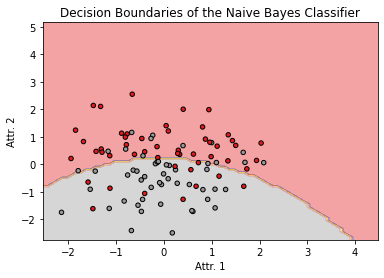

In [19]:
X = X2[:, [0, 1]]
# standarize the data
X2_scaled = preprocessing.scale(X)
# train the classifier
nb.fit(X2_scaled, y2)
# plot the decision boundaries
x_min, x_max = X1_scaled[:, 0].min() - .5, X1_scaled[:, 0].max() + .5
y_min, y_max = X1_scaled[:, 1].min() - .5, X1_scaled[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y2, s=20, edgecolor='k',\
        cmap=plt.cm.Set1)
plt.title('Decision Boundaries of the Naive Bayes Classifier')
plt.xlabel('Attr. 1')
plt.ylabel('Attr. 2')

plt.show()

## LDA classifier

In [20]:
LDA2_performance={}    
for ntraining in range(1,21):
    #We randomly split the data into train and test partitions. We use 2/3 of the data for training and 1/3 for testing.
    X2_train, X2_test, y2_train, y2_test = train_test_split( \
        X2, y2, test_size=1/3, random_state=ntraining)
    #standarization
    scaler = preprocessing.StandardScaler().fit(X2_train)
    X2_train_scaled = scaler.transform(X2_train)
    X2_test_scaled = scaler.transform(X2_test)

    #print(np.var(X2_train[:,0]))
    #print(np.var(X2_train[:,1]))
    #print(np.var(X2_train_scaled[:,0]))
    #print(np.var(X2_train_scaled[:,1]))
    
    if round(np.var(X2_train_scaled[:,0])) == 1 and round(np.var(X2_test_scaled[:,0])) == 1: #we test if var is close to 1 before continue
        #Trainning the calssifier with standarized data
        lda = LinearDiscriminantAnalysis()
        lda.fit(X2_train_scaled, y2_train)
        y2_pred = lda.predict(X2_test_scaled)

        # Predicting and evaluating Naive bayes algorithm performance
        conf = confusion_matrix(y2_test, y2_pred)
        # The matrix conf contains:
        # TN | FN
        # FP | TP

        TN = conf[0][0]
        TP = conf[1][1]
        FP = conf[0][1]
        FN = conf[1][0]
        PredictionAcc=(TP + TN) / (TN + TP + FP + FN)
        TPR=TP / (TP + FN)
        TNR=TN / (TN + FP)
        PredictionError=1-PredictionAcc
        LDA2_performance[ntraining]=[PredictionAcc,PredictionError,TPR,TNR]
        #Once we calculate all the estimations  for each training, we create a DataFrame 
        if ntraining == 20:
            LDA2_df=pd.DataFrame(LDA2_performance,index=['PredictionAcc','PredictionError','TPR','TNR'])
LDA2_df

,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20
PredictionAcc,0.852941,0.794118,0.882353,0.852941,0.852941,0.852941,0.823529,0.823529,0.911765,0.794118,0.852941,0.852941,0.911765,0.764706,0.794118,0.823529,0.852941,0.823529,0.911765
PredictionError,0.147059,0.205882,0.117647,0.147059,0.147059,0.147059,0.176471,0.176471,0.088235,0.205882,0.147059,0.147059,0.088235,0.235294,0.205882,0.176471,0.147059,0.176471,0.088235
TPR,0.777778,0.666667,0.888889,0.772727,0.888889,0.850000,0.823529,0.833333,0.800000,0.761905,0.777778,0.736842,0.863636,0.750000,0.866667,0.714286,0.782609,0.687500,0.944444
TNR,0.937500,0.894737,0.875000,1.000000,0.812500,0.857143,0.823529,0.812500,1.000000,0.846154,0.937500,1.000000,1.000000,0.777778,0.736842,1.000000,1.000000,0.944444,0.875000


In [21]:
#we create a DataFrame with statistics to better see the global approach
LDA2_stats=pd.DataFrame({'mean':LDA2_df.mean(1),'std':LDA2_df.std(1),'max':LDA2_df.max(1),'min':LDA2_df.min(1)},index=['PredictionAcc','PredictionError','TPR','TNR'])
LDA2_stats

,mean,std,max,min
PredictionAcc,0.843653,0.041655,0.911765,0.764706
PredictionError,0.156347,0.041655,0.235294,0.088235
TPR,0.799341,0.073436,0.944444,0.666667
TNR,0.901612,0.086111,1.000000,0.736842


## QDA classifier

In [22]:
QDA2_performance={}    
for ntraining in range(1,21):
    #We randomly split the data into train and test partitions. We use 2/3 of the data for training and 1/3 for testing.
    X2_train, X2_test, y2_train, y2_test = train_test_split( \
        X2, y2, test_size=1/3, random_state=ntraining)
    #standarization
    scaler = preprocessing.StandardScaler().fit(X2_train)
    X2_train_scaled = scaler.transform(X2_train)
    X2_test_scaled = scaler.transform(X2_test)

    #print(np.var(X2_train[:,0]))
    #print(np.var(X2_train[:,1]))
    #print(np.var(X2_train_scaled[:,0]))
    #print(np.var(X2_train_scaled[:,1]))
    
    if round(np.var(X2_train_scaled[:,0])) == 1 and round(np.var(X2_test_scaled[:,0])) == 1: #we test if var is close to 1 before continue
        # Defining the Pipeline
        pipeline = Pipeline([ ('qda', QuadraticDiscriminantAnalysis()) ])
        
        # Indicating Potential Values for the Hyperparameters
        reg_param_values = np.linspace(0, 1, 10).tolist()
        param_grid = { 'qda__reg_param': reg_param_values }
        
        # Evaluating the Performance for each Value of the Hyperparameters
        skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)
        gridcv = GridSearchCV(pipeline, cv=skfold, n_jobs=1, param_grid=param_grid, \
        scoring=make_scorer(accuracy_score))
        result = gridcv.fit(X2_train_scaled, y2_train)
        
        # Obtaining results
        accuracies = gridcv.cv_results_['mean_test_score']
        std_accuracies = gridcv.cv_results_['std_test_score']
        accuracieslist=accuracies.tolist()
        best_accuracyindex=accuracieslist.index(max(accuracieslist))
        best_reg_param= reg_param_values[best_accuracyindex]
        
        #Trainning the classifier with standarized data
        qda = QuadraticDiscriminantAnalysis(reg_param = best_reg_param)
        qda.fit(X2_train_scaled, y2_train)
        y2_pred = qda.predict(X2_test_scaled)

        # Evaluating QDA algorithm performance
        conf = confusion_matrix(y2_test, y2_pred)
        # The matrix conf contains:
        # TN | FN
        # FP | TP

        TN = conf[0][0]
        TP = conf[1][1]
        FP = conf[0][1]
        FN = conf[1][0]
        PredictionAcc=(TP + TN) / (TN + TP + FP + FN)
        TPR=TP / (TP + FN)
        TNR=TN / (TN + FP)
        PredictionError=1-PredictionAcc
        QDA2_performance[ntraining]=[PredictionAcc,PredictionError,TPR,TNR]
        #Once we calculate all the estimations  for each training, we create a DataFrame 
        if ntraining == 20:
            QDA2_df=pd.DataFrame(QDA2_performance,index=['PredictionAcc','PredictionError','TPR','TNR'])
QDA2_df

,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20
PredictionAcc,0.676471,0.441176,0.735294,0.647059,0.705882,0.764706,0.764706,0.794118,0.617647,0.588235,0.705882,0.705882,0.500000,0.558824,0.500000,0.764706,0.529412,0.735294,0.647059
PredictionError,0.323529,0.558824,0.264706,0.352941,0.294118,0.235294,0.235294,0.205882,0.382353,0.411765,0.294118,0.294118,0.500000,0.441176,0.500000,0.235294,0.470588,0.264706,0.352941
TPR,0.611111,0.533333,0.666667,0.909091,0.555556,0.950000,0.705882,0.777778,0.133333,0.809524,0.666667,0.736842,0.590909,0.312500,0.600000,1.000000,0.565217,0.500000,0.666667
TNR,0.750000,0.368421,0.812500,0.166667,0.875000,0.500000,0.823529,0.812500,1.000000,0.230769,0.750000,0.666667,0.333333,0.777778,0.421053,0.384615,0.454545,0.944444,0.625000


In [23]:
#we create a DataFrame with statistics to better see the global approach
QDA2_stats=pd.DataFrame({'mean':QDA2_df.mean(1),'std':QDA2_df.std(1),'max':QDA2_df.max(1),'min':QDA2_df.min(1)},index=['PredictionAcc','PredictionError','TPR','TNR'])
QDA2_stats

,mean,std,max,min
PredictionAcc,0.651703,0.105711,0.794118,0.441176
PredictionError,0.348297,0.105711,0.558824,0.205882
TPR,0.646899,0.207270,1.000000,0.133333
TNR,0.615622,0.250555,1.000000,0.166667


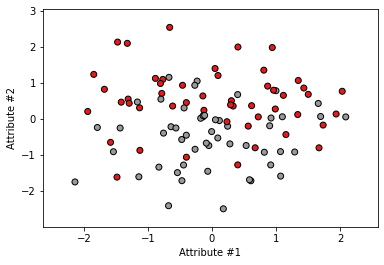

In [24]:
X = X2[:, [0, 1]]
# standarize the data
X2_scaled = preprocessing.scale(X)
# plotting the data
x_min, x_max = X2_scaled[:, 0].min() - .5, X2_scaled[:, 0].max() + .5
y_min, y_max = X2_scaled[:, 1].min() - .5, X2_scaled[:, 1].max() + .5

plt.figure()
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y2, cmap=plt.cm.Set1, \
    edgecolor='k')
plt.xlabel('Attribute #1')
plt.ylabel('Attribute #2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [25]:
lda =  LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X2_scaled, y2)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X2_scaled, y2)

QuadraticDiscriminantAnalysis(store_covariance=True)

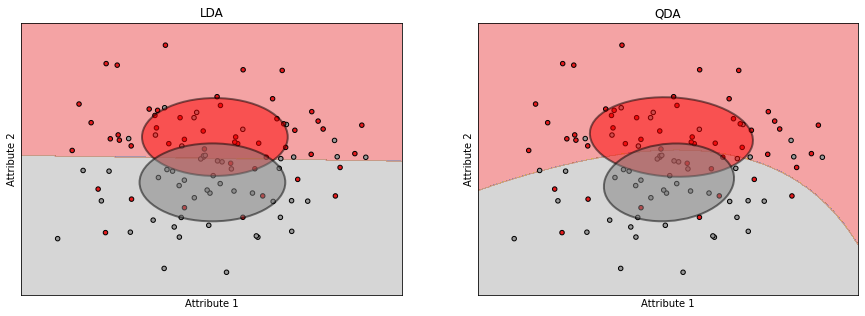

In [26]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 5))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[0].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
axarr[0].scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y2, s=20, edgecolor='k',\
    cmap=plt.cm.Set1)
axarr[0].set_title('LDA')
axarr[0].set_xlabel('Attribute 1')
axarr[0].set_ylabel('Attribute 2')

plot_ellipse(axarr[0], lda.means_[0], lda.covariance_, 'red')
plot_ellipse(axarr[0], lda.means_[1], lda.covariance_, 'gray')

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[1].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
axarr[1].scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y2, s=20, edgecolor='k',\
    cmap=plt.cm.Set1)
axarr[1].set_title('QDA')
axarr[1].set_xlabel('Attribute 1')
axarr[1].set_ylabel('Attribute 2')

plot_ellipse(axarr[1], qda.means_[0], qda.covariance_[0], 'red')
plot_ellipse(axarr[1], qda.means_[1], qda.covariance_[1], 'gray')

plt.show()

## NSC classifier

In [27]:
NSC2_performance={}    
for ntraining in range(1,21):
    #We randomly split the data into train and test partitions. We use 2/3 of the data for training and 1/3 for testing.
    X2_train, X2_test, y2_train, y2_test = train_test_split( \
        X2, y2, test_size=1/3, random_state=ntraining)
    #standarization
    scaler = preprocessing.StandardScaler().fit(X2_train)
    X2_train_scaled = scaler.transform(X2_train)
    X2_test_scaled = scaler.transform(X2_test)

    #print(np.var(X2_train[:,0]))
    #print(np.var(X2_train[:,1]))
    #print(np.var(X2_train_scaled[:,0]))
    #print(np.var(X2_train_scaled[:,1]))
    
    if round(np.var(X2_train_scaled[:,0])) == 1 and round(np.var(X2_test_scaled[:,0])) == 1: #we test if var is close to 1 before continue
        # Defining the Pipeline
        pipeline_nsc = Pipeline([ ('nsc', NearestCentroid()) ])
        
        nsc_no_shrink = NearestCentroid(shrink_threshold = None)
        nsc_no_shrink.fit(X2_train_scaled, y2_train)
        max_param=np.amax(nsc_no_shrink.centroids_)
        # Indicating Potential Values for the Hyperparameters
        shrinkage_param_values = np.linspace(0, max_param, 20).tolist()
        param_grid_nsc = {'nsc__shrink_threshold': shrinkage_param_values}
        
        # Evaluating the Performance for each Value of the Hyperparameters
        skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)
        gridcv_nsc = GridSearchCV(pipeline_nsc, cv=skfold, n_jobs=1, param_grid=param_grid_nsc, \
            scoring=make_scorer(accuracy_score))
        result_nsc = gridcv_nsc.fit(X2_train_scaled, y2_train)
        
        # Obtaining results
        accuracies_nsc = gridcv_nsc.cv_results_['mean_test_score']
        std_accuracies_nsc = gridcv_nsc.cv_results_['std_test_score']
        best_reg_param= shrinkage_param_values[ np.argmax(accuracies_nsc) ]
        
        #Trainning the classifier/fitting the model
        nsc = NearestCentroid(shrink_threshold = best_reg_param)
        nsc.fit(X2_train_scaled, y2_train)
        y2_pred = nsc.predict(X2_test_scaled)
        
        # Evaluating QDA algorithm performance
        conf = confusion_matrix(y1_test, y1_pred)
        
        TN = conf[0][0]
        TP = conf[1][1]
        FP = conf[0][1]
        FN = conf[1][0]
        PredictionAcc=np.sum(np.diag(conf)) / np.sum(conf)
        TPR=TP / (TP + FN)
        TNR=TN / (TN + FP)
        PredictionError=1-PredictionAcc
        NSC2_performance[ntraining]=[PredictionAcc,PredictionError,TPR,TNR]
        #Once we calculate all the estimations  for each training, we create a DataFrame 
        if ntraining == 20:
            NSC2_df=pd.DataFrame(NSC2_performance,index=['PredictionAcc','PredictionError','TPR','TNR'])
NSC2_df

,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20
PredictionAcc,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368
PredictionError,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632
TPR,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576,0.974576
TNR,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778,0.902778


In [28]:
#we create a DataFrame with statistics to better see the global approach
NSC2_stats=pd.DataFrame({'mean':NSC2_df.mean(1),'std':NSC2_df.std(1),'max':NSC2_df.max(1),'min':NSC2_df.min(1)},index=['PredictionAcc','PredictionError','TPR','TNR'])
NSC2_stats

,mean,std,max,min
PredictionAcc,0.947368,0.000000e+00,0.947368,0.947368
PredictionError,0.052632,7.129036e-18,0.052632,0.052632
TPR,0.974576,1.140646e-16,0.974576,0.974576
TNR,0.902778,4.562583e-16,0.902778,0.902778


# Algorithms performance conclusions

## Breast cancer cells data

In [29]:
results_df=pd.DataFrame({'NB':NB_df.iloc[:2].mean(1),'LDA':LDA_df.iloc[:2].mean(1),'QDA':QDA_df.iloc[:2].mean(1),'NSC':NSC_df.iloc[:2].mean(1)},index=['PredictionAcc','PredictionError'])
results_df

,NB,LDA,QDA,NSC
PredictionAcc,0.933421,0.951579,0.963947,0.926842
PredictionError,0.066579,0.048421,0.036053,0.073158


## Prostate data

In [30]:
results2_df=pd.DataFrame({'NB':NB2_df.iloc[:2].mean(1),'LDA':LDA2_df.iloc[:2].mean(1),'QDA':QDA2_df.iloc[:2].mean(1),'NSC':NSC2_df.iloc[:2].mean(1)},index=['PredictionAcc','PredictionError'])
results2_df

,NB,LDA,QDA,NSC
PredictionAcc,0.642415,0.843653,0.651703,0.947368
PredictionError,0.357585,0.156347,0.348297,0.052632


## Prediction error on both datasets

In [33]:
PEresults_df=pd.DataFrame({'NB_wdbc':NB_df.iloc[0:2].mean(1),'LDA_wdbc':LDA_df.iloc[0:2].mean(1),'QDA_wdbc':QDA_df.iloc[0:2].mean(1),'NSC_wdbc':NSC_df.iloc[0:2].mean(1),'NB_prostate':NB2_df.iloc[0:2].mean(1),'LDA_prostate':LDA2_df.iloc[0:2].mean(1),'QDA_prostate':QDA2_df.iloc[0:2].mean(1),'NSC_prostate':NSC2_df.iloc[0:2].mean(1)},index=['PredictionError'])
PEresults_df

,NB_wdbc,LDA_wdbc,QDA_wdbc,NSC_wdbc,NB_prostate,LDA_prostate,QDA_prostate,NSC_prostate
PredictionError,0.066579,0.048421,0.036053,0.073158,0.357585,0.156347,0.348297,0.052632


**What method performs best on each dataset?**  
As we can see in the table above, the classifier that reflects the lowerst error in the breast cancer cells dataset is QDA. However, QDA can be prone to overfitting in small datasets. This linked to the fact that the rest of the accurances are very similar makes it more appropriate to choose any of the other ones. So we choose LDA as the best one as it is the next with the highest accuracy. 
  
The case of the prostate dataset is different as it has a much larger number of attributes:
* NB classifier shows a relatively good prediction accurace, however it has a higher prediction error in comparison with LDA and QDA. This is due to the assumption of independence between the data of a class that this method implies and although sometimes is practical another times leads to suboptimal classifying decisions and performance. 
* LDA considers shared covariance matrices for each class conditional density and its decision boundaries are linear functions. It's less flexible but more robust to overfitting so it will work better with higher amount of data than QDA. That's why its prediction error is higher than QDA's with the WDBC dataset but smaller with this dataset. 
* Finally NCS keeps just the attributes that are relevant for the classification and it may work better in high dimensional problems. In this case, this algorithm is the one with the most prediction accuracy.  

**What method is more flexible according to what we have seen in the lectures?**  
QDA is the more flexible method because:  
* Considers all the data (NSC considers just the relevant data)  
* Not assumes independency (LDA assumes every covariance is the same which is less precise)  

However it is the most prone to overfitting because it computes Maxium Likelyhood in its analysis.

**What method is more robust to over-fitting according to what we have seen in the lectures?**  
NSC is more robust to overfitting than QDA because it computes a maximum a posteriori (MAP) estimation in its analysis. LDA is  more robust to overfitting than NSC and QDA since it is less flexible and has linear limits.  

Nevertheless, NB is more robust than LDA because it estimates less parameters.